In [1]:
from getpass import getpass

admin_rdm_url = 'https://admin.bh.rdm.yzwlab.com/' #'https://admin.staging.rdm.example.com/'
idp_name_1 = None # 'GakuNin RDM IdP'
idp_username_1 = None
idp_password_1 = None
default_result_path = None
close_on_fail = False
transition_timeout = 30000

In [2]:
if idp_username_1 is None:
    idp_username_1 = input(prompt=f'Username for {idp_name_1}')
if idp_password_1 is None:
    idp_password_1 = getpass(prompt=f'Password for {idp_username_1}@{idp_name_1}')
(len(idp_username_1), len(idp_password_1))

# 定期監視-管理者-アドオン利用制御

- サブシステム名: 管理者
- ページ/アドオン: 管理者
- 機能分類: ログイン
- シナリオ名: ログイン確認
- 用意するテストデータ: URL一覧、アカウント(管理者ユーザー1: GRDM)


## GakuNin RDM管理者ページのURLを開く

①ブラウザを開き、画面右上の設定メニューから「シークレットモードで開く」を選択する。  
②新規画面が開かれ、画面上において、「シークレットモードです」と表示されていることを確認する。
以下、シークレットモードにて確認を行う。

③ブラウザを開き、下記URLにアクセスする。  
https://rdm.example.com/  

In [3]:
import tempfile

work_dir = tempfile.mkdtemp()
if default_result_path is None:
    default_result_path = work_dir
work_dir

'/tmp/tmpiq0an_8o'

In [21]:
import importlib
import pandas as pd

import scripts.playwright
importlib.reload(scripts.playwright)

from scripts.playwright import *
from scripts import grdm

await init_pw_context(close_on_fail=close_on_fail, last_path=default_result_path)

('20250421-023318', '/tmp/tmp2cz7qv1w')

Start epoch: 1745202798.9690514 seconds


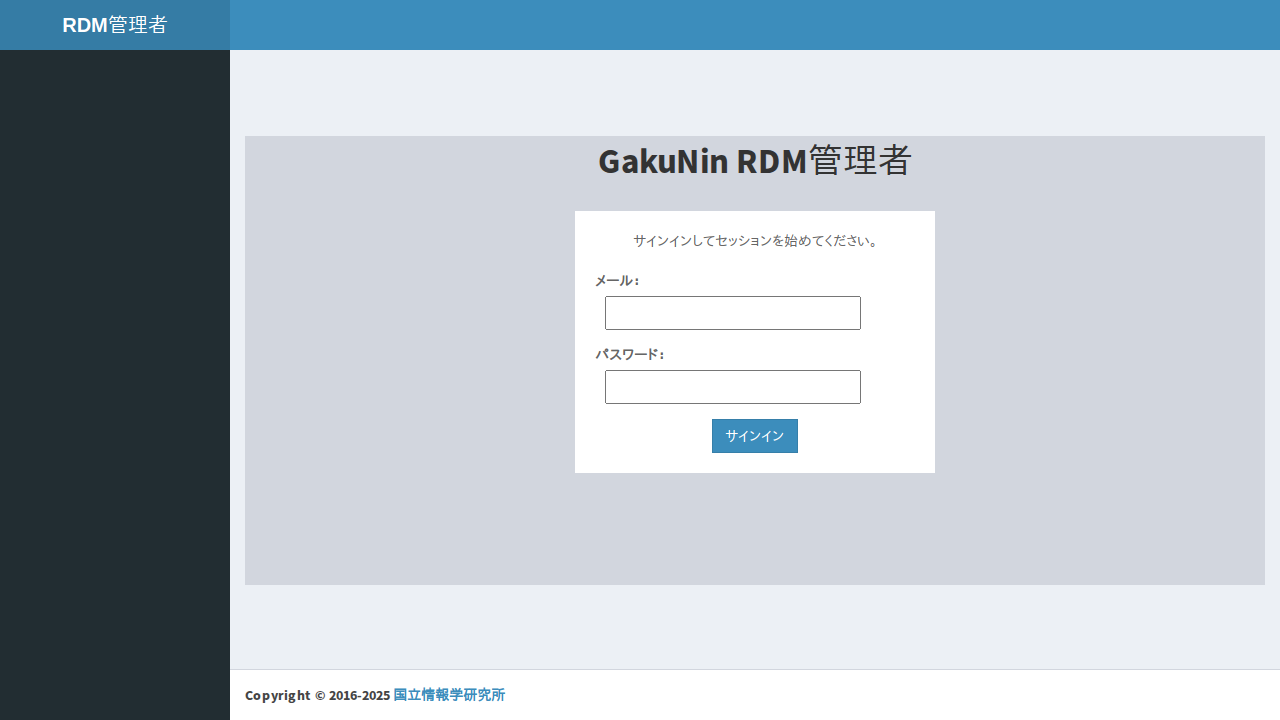

In [22]:
import time

async def _step(page):
    await page.goto(admin_rdm_url)

    await expect(page.locator('.login-logo')).to_be_visible(timeout=30000)

await run_pw(_step)

## ログイン情報を用いてGakuNin RDMにログインする

(IdPに関するログイン情報が与えられた場合、)
GakuNin Embeded DSのプルダウンを展開し、IdPリストから指定されたIdPを選択する。その後、アカウントのID/Passwordを入力して「Login」ボタンを押下する。

(IdPが指定されていない場合、)
CASのログイン操作を実施する。

Start epoch: 1745202799.696494 seconds


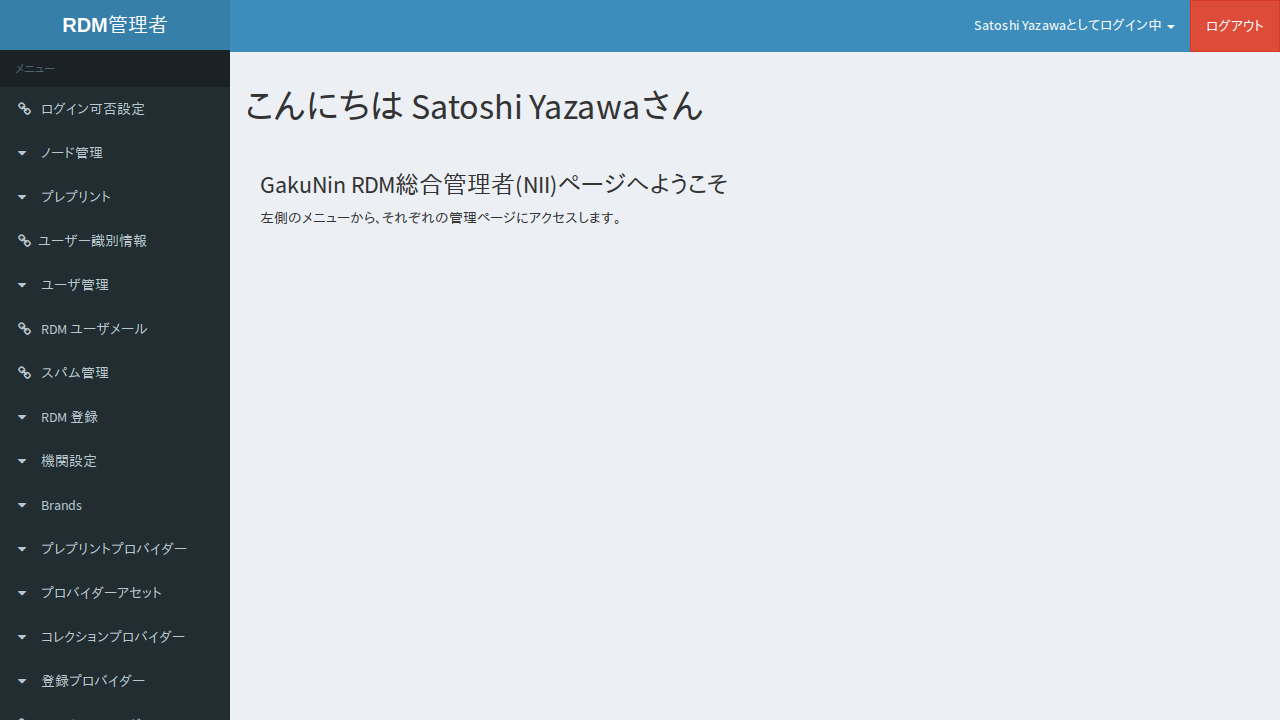

In [23]:
import scripts.grdm
importlib.reload(scripts.grdm)

async def _step(page):
    await scripts.grdm.login_as_admin(
        page, idp_name_1, idp_username_1, idp_password_1, transition_timeout=transition_timeout
    )

    await expect(page.locator('//*[contains(@class, "btn-danger") and contains(text(), "ログアウト")]')).to_be_enabled(timeout=transition_timeout)

await run_pw(_step)

## 「アドオン利用制御」を選択する

「アドオン利用制御」が表示される

Start epoch: 1745202800.624618 seconds


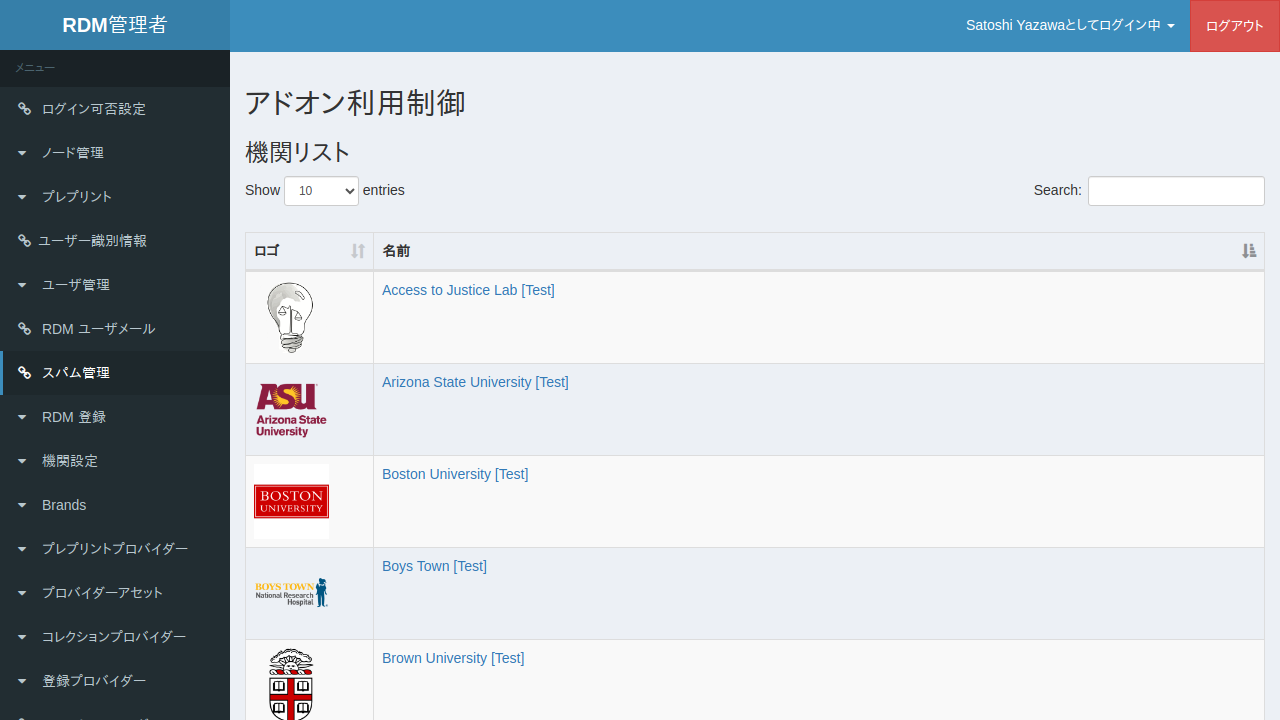

In [24]:
async def _step(page):
    await page.locator('//a[@href = "/addons/"]').click(timeout=transition_timeout)

    #await expect(page.locator('//*[text() = "PDFダウンロード"]')).to_be_enabled(timeout=transition_timeout * 5)
    await expect(page.locator('//input[@type = "search"]')).to_be_visible(timeout=transition_timeout)

await run_pw(_step)

## 機関リストの名前欄にある「GakuNin RDM IdP」をクリックする

Start epoch: 1745202801.2906969 seconds


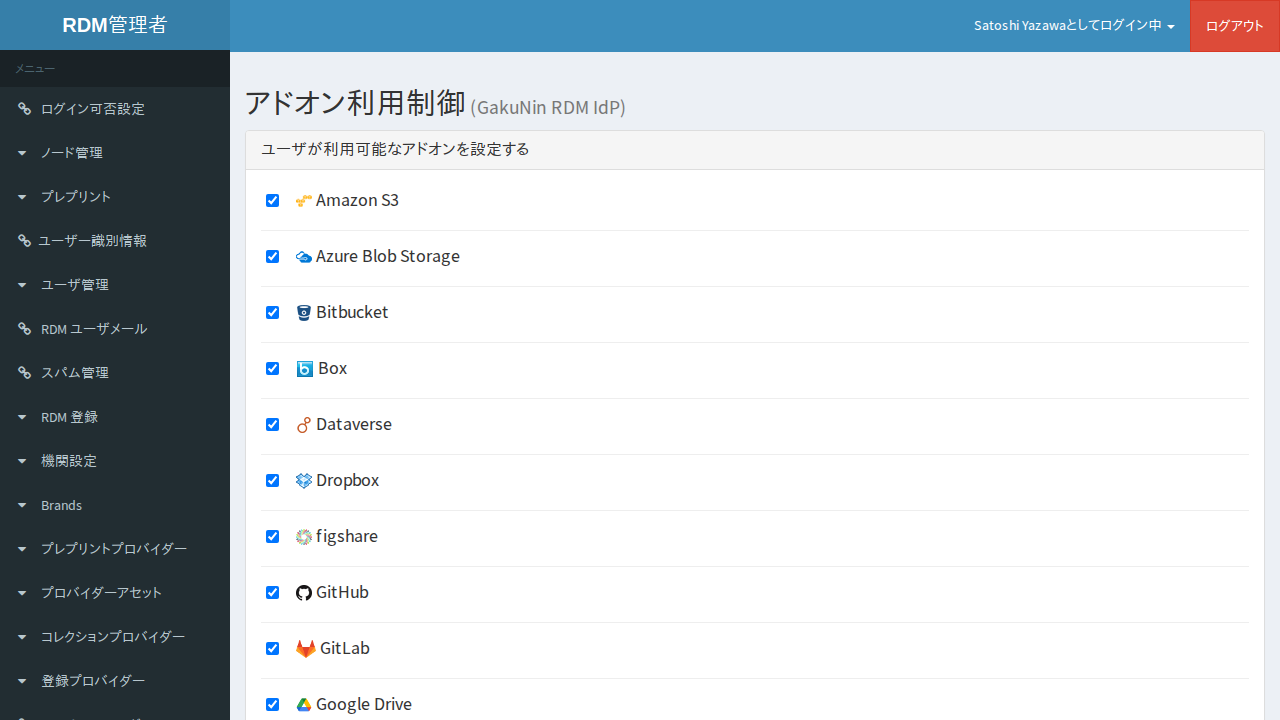

In [25]:
import asyncio
target_organization = 'GakuNin RDM IdP'

async def _step(page):
    await page.locator('//input[@type = "search"]').fill(target_organization)

    organization_link = page.locator(f'//a[contains(text(), "{target_organization}")]')
    await expect(organization_link).to_be_visible()
    await organization_link.click()
    await expect(page.locator('//h4[@class = "addon-title"]//*[text() = "Amazon S3"]')).to_be_enabled(timeout=transition_timeout)
    await asyncio.sleep(3)

await run_pw(_step)

## 「AmazonS3」のチェックボックスを外す

「Amazon S3を禁止しますか？」のアクティブウィンドウが表示される

Start epoch: 1745202807.8911963 seconds


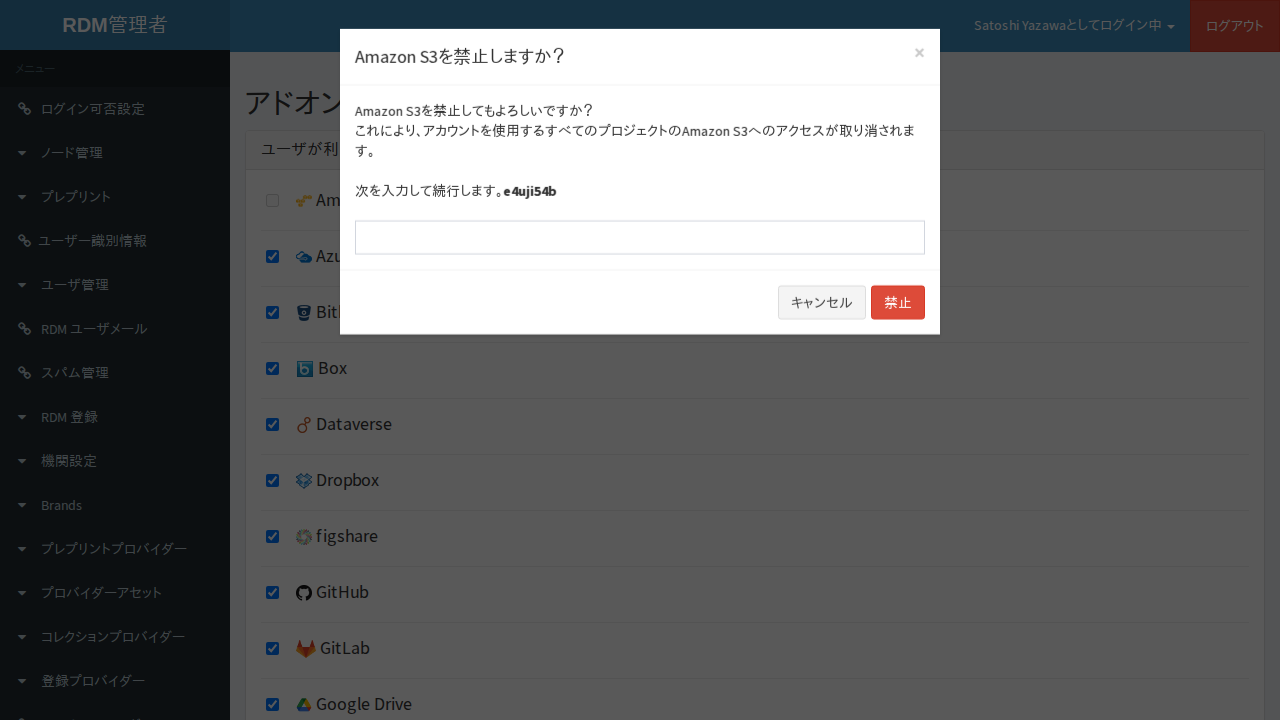

In [26]:
async def _step(page):
    # 即時にチェックボックスを外すと、ダイアログが表示されない...？
    await asyncio.sleep(5)
    await page.locator('//input[@type = "checkbox" and @data-addon-full-name = "Amazon S3"]').click()
    
    await expect(page.locator('//h4[text() = "Amazon S3を禁止しますか？"]')).to_be_visible(timeout=transition_timeout)

await run_pw(_step)

## 「キャンセル」ボタンを押下する


「Amazon S3の禁止」をキャンセルする


Start epoch: 1745202821.6986778 seconds


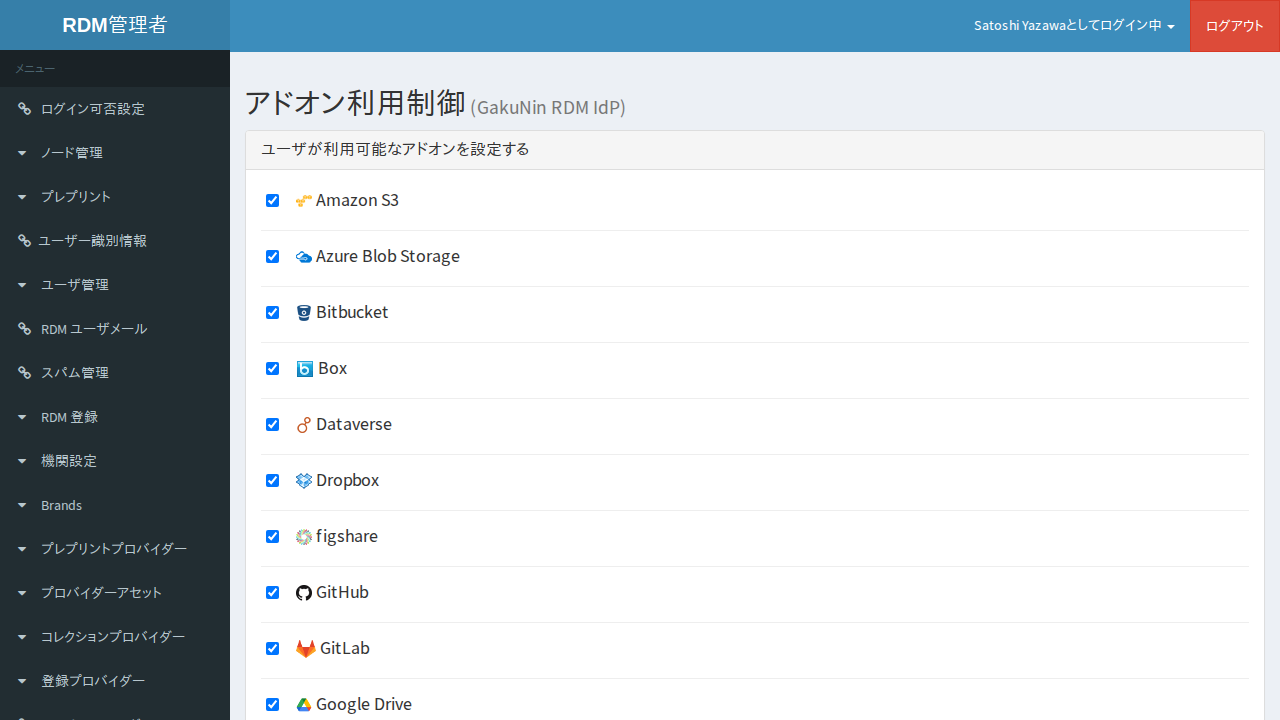

In [27]:
async def _step(page):
    await page.locator('//button[@data-bb-handler = "cancel"]').click()
    await expect(page.locator('//h4[text() = "Amazon S3を禁止しますか？"]')).to_have_count(0)

await run_pw(_step)

終了処理を実施。

In [28]:
await finish_pw_context()

Video: /tmp/tmpiq0an_8o/video-1.webm
HAR: /tmp/tmpiq0an_8o/har.zip


In [14]:
!rm -fr {work_dir}